In [1]:
import numpy as np
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 打标签

In [2]:
risk_factors_B1 = [
    'pregnant', 'fever', 'diabetes', 'HIV', 'cancer', 'asthma', 'sepsis',
    'hypertension', 'arrhythmia', 'dyspnea', 'high fever', 'neutrophilia',
    'lymphocytopenia', 'methylprednisolone', 'leukocytosis', 'LDH', 'IL-6',
    'CD4', 'CD3', 'CD8', 'd-dimer', 'D-dime', 'socioeconomics', 'pregnancy',
    'AMI','cigarette','HIV-1'
]
risk_factors_B2 = [
    'older', 'lung', 'lactate', 'serum', 'high-sensitivity',
    'high-sensitivity', 'aspartate', 'alanine', 'medical', 'heart',
    'cardiovascular', 'coronary', 'liver', 'nervous', 'chronic', 'chronic',
    'coagulation', 'myocardial', 'plasma', 'chronic'
]

risk_factors_I = [
    'adults', 'age', 'disease', 'system', 'kidney', 'dysfunction',
    'respiratory', 'infarction', 'renal', 'failure', 'fever', 'dehydrogenase',
    'urea', 'creatinine', 'cardiac', 'troponin'
    'C-reactive', 'protein', 'aminotransferase', 'resource', 'women'
]

In [3]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    for i in range(len(sent)):
        word, p_tag = sent[i]
        if word in risk_factors_B1:
            sent[i] = (word, p_tag, 'B')
        elif word in risk_factors_B2 and i != len(sent)-1 and sent[i+1][0] in risk_factors_I:
            sent[i] = (word, p_tag, 'B')
        elif word in risk_factors_I and i>0 and (sent[i-1][2]=='B' or sent[i-1][2]=='I'):
            sent[i] = (word, p_tag, 'I')
        else:
            sent[i] = (word, p_tag, 'O')       
    return sent



In [4]:
def pprint(sent):
    print(' '.join(word for word,q,w in sent))
    for j in sent:
        print(j)

In [5]:
ex = 'The third influenza study was an RCT that investigated the efficacy of the influenza vaccine among older adults in Japanese LTCFs .ipynb_checkpoints/'
pprint(preprocess(ex))

The third influenza study was an RCT that investigated the efficacy of the influenza vaccine among older adults in Japanese LTCFs .ipynb_checkpoints/
('The', 'DT', 'O')
('third', 'JJ', 'O')
('influenza', 'NN', 'O')
('study', 'NN', 'O')
('was', 'VBD', 'O')
('an', 'DT', 'O')
('RCT', 'NNP', 'O')
('that', 'WDT', 'O')
('investigated', 'VBD', 'O')
('the', 'DT', 'O')
('efficacy', 'NN', 'O')
('of', 'IN', 'O')
('the', 'DT', 'O')
('influenza', 'JJ', 'O')
('vaccine', 'NN', 'O')
('among', 'IN', 'O')
('older', 'JJR', 'B')
('adults', 'NNS', 'I')
('in', 'IN', 'O')
('Japanese', 'JJ', 'O')
('LTCFs', 'NNP', 'O')
('.ipynb_checkpoints/', 'NN', 'O')


# 数据预选

In [6]:
a = np.load('risk_factor_sen.npy')
a = a.tolist()
sentences_100000 = []
for i in a:
    sentences_100000.extend(i)
len(sentences_100000)


101468

In [7]:
sentences = []
for i in range(len(sentences_100000)):
    if 'risk' in sentences_100000[i]:
        sentences.append(sentences_100000[i])
    if i%30 == 0:
        sentences.append(sentences_100000[i])
del_index = []    

for i in range(len(sentences)):
    if len(sentences[i]) > 512 or len(word_tokenize(sentences[i])) > 70:
        del_index.append(i)

for i in del_index[::-1]:
    del sentences[i]

        
print(len(sentences))
for i in [500,1000,1500,2000,2500,3000]:
    pprint(preprocess(sentences[i]))

6272
In this situation , opportunity to weigh the risks and benefits to a pregnancy before exposure to the medication or vaccine is missed ; instead , consideration must focus on any effects these measures may have had on the fetus .
('In', 'IN', 'O')
('this', 'DT', 'O')
('situation', 'NN', 'O')
(',', ',', 'O')
('opportunity', 'NN', 'O')
('to', 'TO', 'O')
('weigh', 'VB', 'O')
('the', 'DT', 'O')
('risks', 'NNS', 'O')
('and', 'CC', 'O')
('benefits', 'NNS', 'O')
('to', 'TO', 'O')
('a', 'DT', 'O')
('pregnancy', 'NN', 'B')
('before', 'IN', 'O')
('exposure', 'NN', 'O')
('to', 'TO', 'O')
('the', 'DT', 'O')
('medication', 'NN', 'O')
('or', 'CC', 'O')
('vaccine', 'NN', 'O')
('is', 'VBZ', 'O')
('missed', 'VBN', 'O')
(';', ':', 'O')
('instead', 'RB', 'O')
(',', ',', 'O')
('consideration', 'NN', 'O')
('must', 'MD', 'O')
('focus', 'VB', 'O')
('on', 'IN', 'O')
('any', 'DT', 'O')
('effects', 'NNS', 'O')
('these', 'DT', 'O')
('measures', 'NNS', 'O')
('may', 'MD', 'O')
('have', 'VB', 'O')
('had', 'VBN'

In [8]:
max_len = 0
num = 0
for i in sentences:
    if len(word_tokenize(i)) > max_len:
        max_len = len(word_tokenize(i))
    if len(word_tokenize(i)) > 70:
        num = num + 1
print(max_len)
print(num)

70
0


## 删去没有B的

In [9]:
num = 0
temp = []
def haveB(sent):
    sent = preprocess(sent)
    for i in sent:
        if i[2]=='B':
            return True
    return False
for i in range(len(sentences)):
    if haveB(sentences[i]):
        num = num + 1
        temp.append(sentences[i])
print(num)
sentences = temp


4668


# tokenizer 也得包含要predict的数据的，不然转换有问题

In [10]:
all_sent = []
pos_sentences = pd.read_excel('positive_sent.xlsx').sentence
for i in sentences:
    all_sent.extend(preprocess(i))
for i in pos_sentences:
    all_sent.extend(preprocess(i))
df = pd.DataFrame(all_sent,columns=['word', 'pos_tag', 'BIO_tag'])
df.head(10)

,word,pos_tag,BIO_tag
0,The,DT,O
1,majority,NN,O
2,of,IN,O
3,all,DT,O
4,norovirus,JJ,O
5,outbreaks,NNS,O
6,reported,VBN,O
7,to,TO,O
8,the,DT,O
9,CDC,NNP,O


In [11]:
words = list(df['word'].unique())
print(len(words))
tags = ['B', 'I', 'O']

word_to_index = {w : i + 2 for i,w in enumerate(words)}
word_to_index['PAD'] = 0
word_to_index['UNK'] = 1

tag_to_index = {t : i +1 for i,t in enumerate(tags)}
tag_to_index['PAD'] = 0

idx2word = {i : w for w,i in word_to_index.items()}
idx2tag = {i : t for t,i in tag_to_index.items()}

28640


# Model

In [35]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
all_sent = []
max_len = 70
for i in sentences:
    all_sent.append(preprocess(i))
X = [[word_to_index[w[0]] for w in preprocess(s)] for s in sentences]
X = pad_sequences(maxlen=max_len,
                  sequences=X,
                  padding="post",
                  value=word_to_index["PAD"])

y = [[tag_to_index[w[2]] for w in preprocess(s)] for s in sentences]
y = pad_sequences(maxlen=max_len,
                  sequences=y,
                  padding="post",
                  value=tag_to_index["PAD"])
# y = [to_categorical(i, num_classes = 4) for i in y]

In [37]:
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Size of training input data : ", X_train.shape)
print("Size of training output data : ", np.array(y_train).shape)
print("Size of testing input data : ", X_test.shape)
print("Size of testing output data : ", np.array(y_test).shape)


Size of training input data :  (3501, 70)
Size of training output data :  (3501, 70)
Size of testing input data :  (1167, 70)
Size of testing output data :  (1167, 70)


In [38]:
print('*****Before Processing first sentence : *****\n', sentences[0])
print('*****After Processing first sentence : *****\n ', X[0])

*****Before Processing first sentence : *****
 


The majority of all norovirus outbreaks reported to the CDC occur in long-term care facilities 60 , including nursing homes, where older residents are at risk for more severe or nursing homes  , the number of older adults using paid long-term care services is expected to 78 grow substantially over the coming decade  .
*****After Processing first sentence : *****
  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 18 22 23 24
 25 26 27 28 29 30 31 20 21 18 10 32  4 23 33 34 35 14 15 36 37 38  9 39
 40 41 42 10 43 44 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [39]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from crf import CRF

class MyBiLSTMCRF:
    def __init__(self, vocab_size, max_len, label_size, embedding_size, hidden_size, tagIndexDict, sequenceLengths=None):
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.max_len = max_len
        self.label_size = label_size
        self.hidden_size = hidden_size
        self.sequenceLengths=sequenceLengths
        self.tagIndexDict=tagIndexDict

        self.buildBiLSTMCRF()

#     def getTransParam(self,y,tagIndexDict):
#         self.trainY=np.argmax(y,axis=-1)
#         yList=self.trainY.tolist()
#         transParam=np.zeros([len(list(tagIndexDict.keys())),len(list(tagIndexDict.keys()))])
#         for rowI in range(len(yList)):
#             for colI in range(len(yList[rowI])-1):
#                 transParam[yList[rowI][colI]][yList[rowI][colI+1]]+=1
#         for rowI in range(transParam.shape[0]):
#             transParam[rowI]=transParam[rowI]/np.sum(transParam[rowI])
#         return transParam
    
    def buildBiLSTMCRF(self):

        myModel=Sequential()
        myModel.add(tf.keras.layers.Input(shape=(self.max_len,)))
        myModel.add(tf.keras.layers.Embedding(self.vocab_size, self.embedding_size))
        myModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
                    self.hidden_size, return_sequences=True, activation="tanh"), merge_mode='sum'))
        crf=CRF(self.label_size,name='crf_layer')
        myModel.add(crf)
        myModel.compile('adam', loss={'crf_layer': crf.get_loss}, metrics=['accuracy'])
        self.myBiLSTMCRF=myModel
        
#     def fit(self,X,y,epochs=100,transParam=None):
#         if len(y.shape)==3:
#             y=np.argmax(y,axis=-1)
#         if self.sequenceLengths is None:
#             self.sequenceLengths=[row.shape[0] for row in y]
#         log_dir = "logs"
#         tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#         history=self.myBiLSTMCRF.fit(X,y,epochs=epochs,callbacks=[tensorboard_callback])

#         return history

    def predict(self,X):
        preYArr=self.myBiLSTMCRF.predict(X)
        return preYArr

In [40]:
hidden_size = 32
embedding_size = 50
vocab_size = len(words) + 2
label_size = 4
max_len = 70
BATCH_SIZE = 32
myModel=MyBiLSTMCRF(vocab_size, max_len, label_size, embedding_size, hidden_size, tag_to_index)
myModel.myBiLSTMCRF.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 70, 50)            1432100   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 70, 32)            21248     
_________________________________________________________________
crf_layer (CRF)              (None, 70)                156       
Total params: 1,453,504
Trainable params: 1,453,504
Non-trainable params: 0
_________________________________________________________________


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
history = myModel.myBiLSTMCRF.fit(X_train,
                                  y_train,
                                  epochs=5,
                                  batch_size=BATCH_SIZE,
                                  verbose=1,
                                  validation_data=(X_test, y_test)
                                  )

(3501, 70)
(3501, 70)
(1167, 70)
(1167, 70)
Train on 3501 samples, validate on 1167 samples
Epoch 1/5
3501/3501 [==============================] - 8s 2ms/sample - loss: 0.4003 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 1.0000
Epoch 2/5
3501/3501 [==============================] - 8s 2ms/sample - loss: 0.2753 - accuracy: 1.0000 - val_loss: 0.3258 - val_accuracy: 1.0000
Epoch 3/5
3501/3501 [==============================] - 9s 2ms/sample - loss: 0.2020 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 1.0000
Epoch 4/5
3501/3501 [==============================] - 8s 2ms/sample - loss: 0.1459 - accuracy: 1.0000 - val_loss: 0.2790 - val_accuracy: 1.0000
Epoch 5/5
3501/3501 [==============================] - 9s 2ms/sample - loss: 0.1150 - accuracy: 1.0000 - val_loss: 0.2934 - val_accuracy: 1.0000


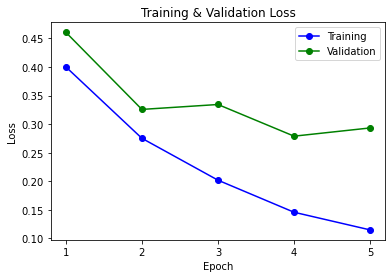

In [6]:
epoches = [1,2,3,4,5]
losses = [0.4003,0.2753,0.2020,0.1459,0.1150]
val_losses = [0.4608,0.3258,0.3344,0.2790,0.2934]
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the learning curve.
plt.plot(epoches,losses, 'b-o', label="Training")
plt.plot(epoches,val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
history = myModel.myBiLSTMCRF.fit(X_train,
                                  y_train,
                                  epochs=1,
                                  batch_size=BATCH_SIZE,
                                  verbose=10,
                                  validation_data=(X_test, y_test),
                                  callbacks=[
                                      tf.keras.callbacks.EarlyStopping(
                                          monitor='val_accuracy',
                                          min_delta=0,
                                          patience=1,
                                          verbose=0,
                                          mode='max')
                                  ])

(3501, 70)
(3501, 70)
(1167, 70)
(1167, 70)
Train on 3501 samples, validate on 1167 samples


In [43]:
preY=myModel.predict(X[0:3])[0]
print(' '.join([idx2word[word] for word in X[0]]))
print(' '.join([idx2tag[tag] for tag in preY]))

The majority of all norovirus outbreaks reported to the CDC occur in long-term care facilities 60 , including nursing homes , where older residents are at risk for more severe or nursing homes , the number of older adults using paid long-term care services is expected to 78 grow substantially over the coming decade . PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O B I O O O O O O O O O O O O O O O O PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD


In [44]:
preY=myModel.predict(X[0:3])
print(preY)
print([idx2word[X[0][j]] for j,ttag in enumerate(preY[0]) if idx2tag[ttag]=='B'])

[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 3 3 3 3 3 3 1 2 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['older']


In [45]:
def get_risk_factor(x):
    x_risk_factors = []
    preY=myModel.predict(x)
    for i in range(len(preY)):
        temp = [idx2word[x[i][j]] for j,ttag in enumerate(preY[i]) if idx2tag[ttag]=='B' or idx2tag[ttag]=='I']
        if len(temp)==0:
            temp = ['None']
        x_risk_factors.append(temp)
    return x_risk_factors
temp_risk_factors = get_risk_factor(X[3000:3010])
print(temp_risk_factors)

[['asthma'], ['asthma', 'asthma'], ['asthma'], ['asthma', 'cancer'], ['asthma', 'cancer'], ['asthma', 'cancer'], ['asthma'], ['asthma'], ['disease', 'asthma'], ['asthma']]


# 在positive句子上试试

In [46]:
pos_sentences = pd.read_excel('positive_sent.xlsx').sentence
del_index = []    

for i in range(len(pos_sentences)):
    if len(pos_sentences[i]) > 512 or len(word_tokenize(pos_sentences[i])) > 70:
        del_index.append(i)

for i in del_index[::-1]:
    del pos_sentences[i]

all_positive_sent = []
max_len = 70
for i in pos_sentences:
    all_positive_sent.append(preprocess(i))
    



In [47]:
print(len(all_positive_sent))
print(all_positive_sent[3])

22281
[('This', 'DT', 'O'), ('study', 'NN', 'O'), ('provides', 'VBZ', 'O'), ('an', 'DT', 'O'), ('inexpensive', 'JJ', 'O'), ('way', 'NN', 'O'), ('to', 'TO', 'O'), ('discover', 'VB', 'O'), ('functional', 'JJ', 'O'), ('motif', 'NN', 'O'), ('for', 'IN', 'O'), ('BEFV', 'NNP', 'O'), ('infection', 'NN', 'O'), ('using', 'VBG', 'O'), ('the', 'DT', 'O'), ('phage-display', 'NN', 'O'), ('technology', 'NN', 'O'), (',', ',', 'O'), ('which', 'WDT', 'O'), ('is', 'VBZ', 'O'), ('possible', 'JJ', 'O'), ('to', 'TO', 'O'), ('find', 'VB', 'O'), ('the', 'DT', 'O'), ('potential', 'JJ', 'O'), ('protein', 'NN', 'O'), ('to', 'TO', 'O'), ('mediate', 'VB', 'O'), ('the', 'DT', 'O'), ('interaction', 'NN', 'O'), ('between', 'IN', 'O'), ('BEFV', 'NNP', 'O'), ('and', 'CC', 'O'), ('the', 'DT', 'O'), ('host', 'NN', 'O'), ('.', '.', 'O')]


In [48]:
print(type(pos_sentences.tolist()))
print(len(pos_sentences))

<class 'list'>
22281


In [49]:
X_pos =  [w for w in preprocess(pos_sentences[0])]


In [50]:
X_pos = [ [word_to_index[w[0]] for w in preprocess(s)] for s in pos_sentences.tolist()]

print('OK')
X_pos = pad_sequences(maxlen=max_len,
                  sequences=X_pos,
                  padding="post",
                  value=word_to_index["PAD"])
risk_factors_all = get_risk_factor(X_pos)
df = pd.DataFrame({'sentences':pos_sentences, 'risk factor':risk_factors_all})
df.head(10)
df.to_excel('positive_sent_NER.xlsx')    

OK
